<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/SLDA_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                          

<ipython-input-4-62e965cb6e76>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")


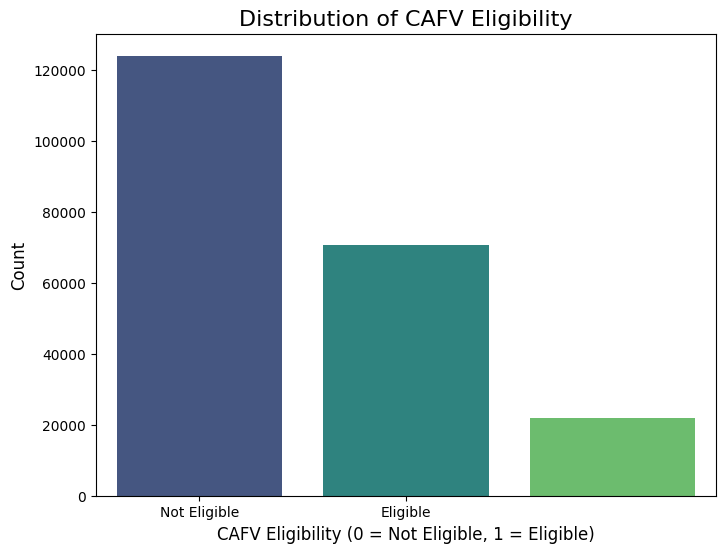


Summary Statistics for Numerical Features:
       Electric Range      Base MSRP     Model Year
count   216753.000000  216753.000000  216772.000000
mean        49.428386     870.987045    2021.129039
std         86.224511    7544.671592       2.983918
min          0.000000       0.000000    1999.000000
25%          0.000000       0.000000    2020.000000
50%          0.000000       0.000000    2022.000000
75%         42.000000       0.000000    2023.000000
max        337.000000  845000.000000    2025.000000


<ipython-input-4-62e965cb6e76>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',


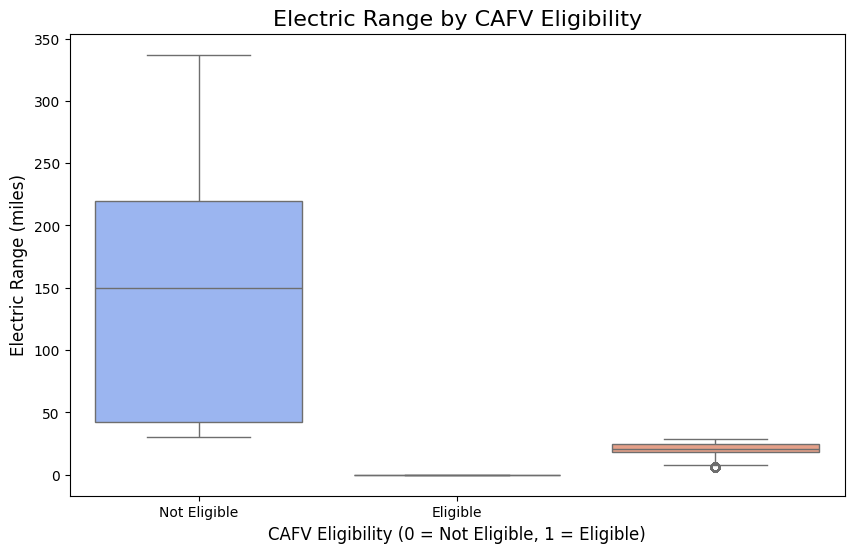

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.csv'  # Replace with the actual path to your dataset
ev_data = pd.read_csv(file_path)

# 1. Basic Information about the Dataset
print("Basic Dataset Information:")
print(ev_data.info())  # Data types, non-null counts

# 2. Summarize Each Column
print("\nData Summary:")
data_summary = pd.DataFrame({
    "Column": ev_data.columns,
    "Data Type": ev_data.dtypes,
    "Unique Values": ev_data.nunique(),
    "Missing Values": ev_data.isnull().sum(),
    "Example Value": ev_data.iloc[0].values
})
print(data_summary)

# 3. Check Distribution of Target Variable (CAFV Eligibility)
print("\nTarget Variable Distribution:")
target_distribution = ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
target_distribution_percent = target_distribution / len(ev_data) * 100
print(target_distribution, "\n")
print("Percentage Distribution:")
print(target_distribution_percent)

# Visualize the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")
plt.title("Distribution of CAFV Eligibility", fontsize=16)
plt.xlabel("CAFV Eligibility (0 = Not Eligible, 1 = Eligible)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], labels=["Not Eligible", "Eligible"])
plt.show()

# 4. Summary Statistics for Numerical Columns
numerical_features = ['Electric Range', 'Base MSRP', 'Model Year']
print("\nSummary Statistics for Numerical Features:")
print(ev_data[numerical_features].describe())

# 5. Relationship Exploration: Electric Range vs CAFV Eligibility
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
            y='Electric Range',
            data=ev_data,
            palette="coolwarm")
plt.title("Electric Range by CAFV Eligibility", fontsize=16)
plt.xlabel("CAFV Eligibility (0 = Not Eligible, 1 = Eligible)", fontsize=12)
plt.ylabel("Electric Range (miles)", fontsize=12)
plt.xticks([0, 1], labels=["Not Eligible", "Eligible"])
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 1. Data Transformation
# Encode categorical features and target variable using LabelEncoder
categorical_features = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Utility']
label_encoder = LabelEncoder()

for feature in categorical_features:
    ev_data[feature] = label_encoder.fit_transform(ev_data[feature])

# Encode the target variable ('CAFV Eligibility')
ev_data['CAFV Eligibility'] = label_encoder.fit_transform(
    ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
)

# Drop unnecessary columns (e.g., identifiers, location)
columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract']
ev_data = ev_data.drop(columns=columns_to_drop, axis=1)

print("\nAfter Transformation:")
print(ev_data.head())

# 2. Data Integration
# For simplicity, this example assumes that the dataset is already integrated.
# If additional external data is available, you can merge it using `pd.merge()`.

# 3. Missing Data Imputation
# Identify missing values again (if any)
missing_summary = ev_data.isnull().sum()
print("\nMissing Data Summary Before Imputation:")
print(missing_summary)

# Separate numerical and categorical columns for imputation
numerical_columns = ev_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = ev_data.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
ev_data[numerical_columns] = numerical_imputer.fit_transform(ev_data[numerical_columns])

# Impute missing values in categorical columns with the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
ev_data[categorical_columns] = categorical_imputer.fit_transform(ev_data[categorical_columns])

# Verify no missing values remain
missing_summary_after = ev_data.isnull().sum()
print("\nMissing Data Summary After Imputation:")
print(missing_summary_after)

# 4. Final Dataset
print("\nFinal Dataset After Data Preparation:")
print(ev_data.info())



After Transformation:
   County  City  State  Postal Code  Model Year  Make  Model  \
0      87   615     44      98177.0        2013    29     86   
1      87   604     44      98112.0        2019    37     90   
2      89   476     44      98359.0        2021    41     77   
3     185   479     44      98501.0        2017    39    103   
4     185   479     44      98506.0        2016    12     23   

   Electric Vehicle Type  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                      0            Clean Alternative Fuel Vehicle Eligible   
1                      0            Clean Alternative Fuel Vehicle Eligible   
2                      0  Eligibility unknown as battery range has not b...   
3                      1              Not eligible due to low battery range   
4                      1              Not eligible due to low battery range   

   Electric Range  Base MSRP  Legislative District  Electric Utility  \
0            75.0        0.0                 

Numerical Features:
 Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'Electric Range', 'Base MSRP',
       'Legislative District', 'Electric Utility', 'CAFV Eligibility'],
      dtype='object')

Categorical Features:
 Index(['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], dtype='object')

Statistical Summary of Numerical Features:
              County           City          State    Postal Code  \
count  216772.000000  216772.000000  216772.000000  216772.000000   
mean      107.606923     422.215203      43.952236   98179.749451   
std        45.500028     227.000000       1.239193    2458.291986   
min         0.000000       0.000000       0.000000    1731.000000   
25%        87.000000     218.000000      44.000000   98052.000000   
50%        87.000000     479.000000      44.000000   98125.000000   
75%       139.000000     604.000000      44.000000   98374.000000   
max       205.000000     762.000000      46.0

<ipython-input-6-20cf1bf07375>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CAFV Eligibility', data=ev_data, palette="viridis")


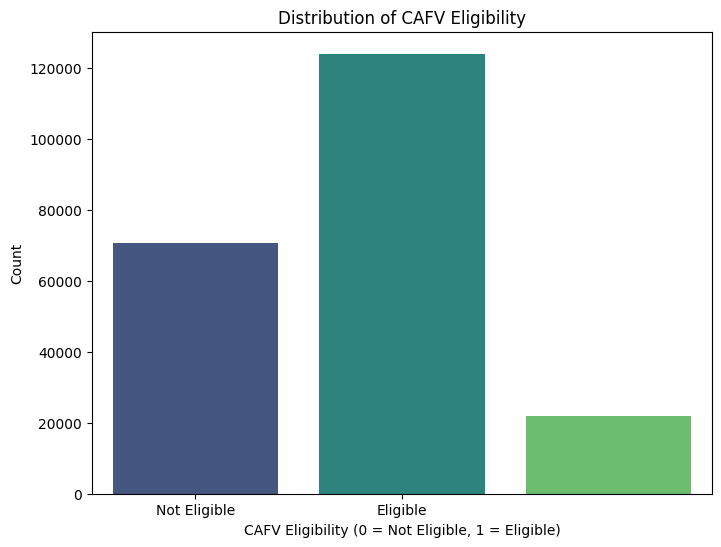

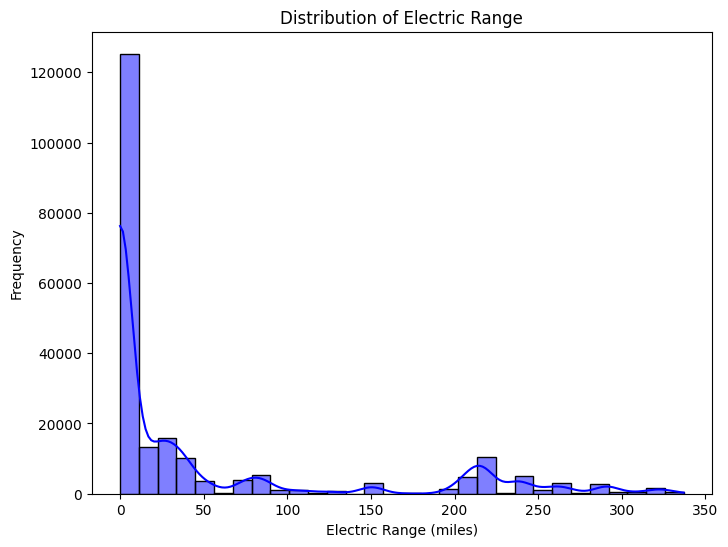

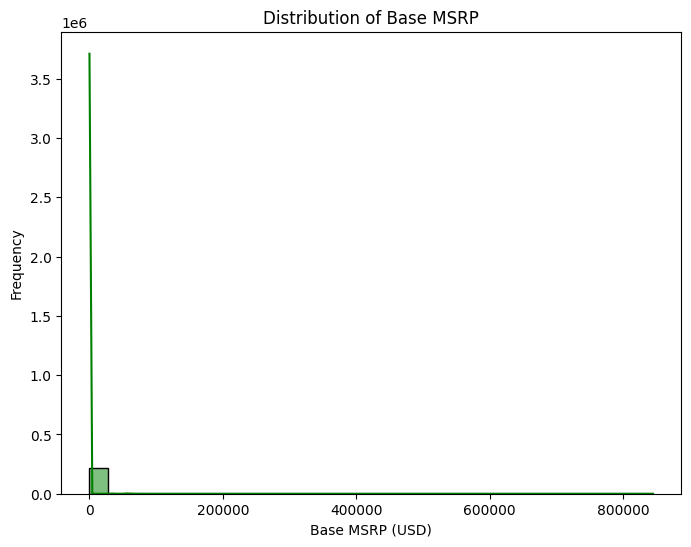

<ipython-input-6-20cf1bf07375>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CAFV Eligibility', y='Electric Range', data=ev_data, palette="coolwarm")


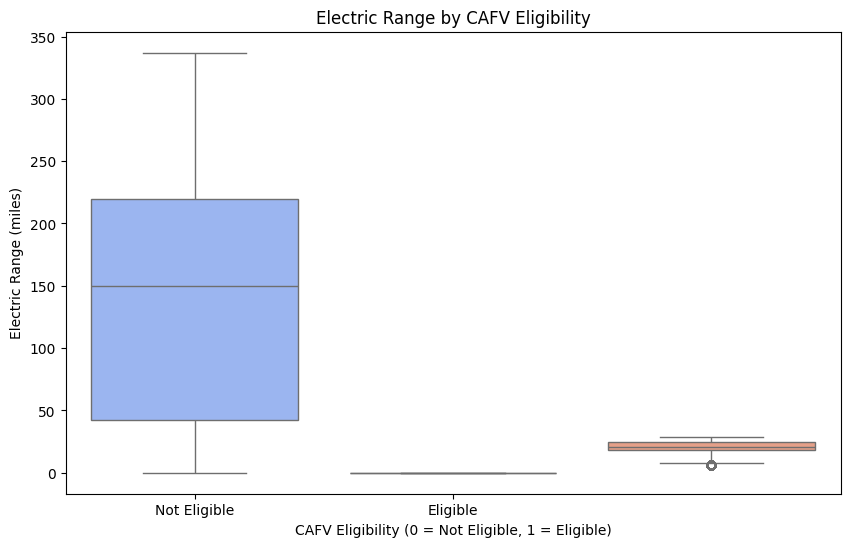


Number of Outliers in Electric Range: 37839
Number of Outliers in Base MSRP: 3307


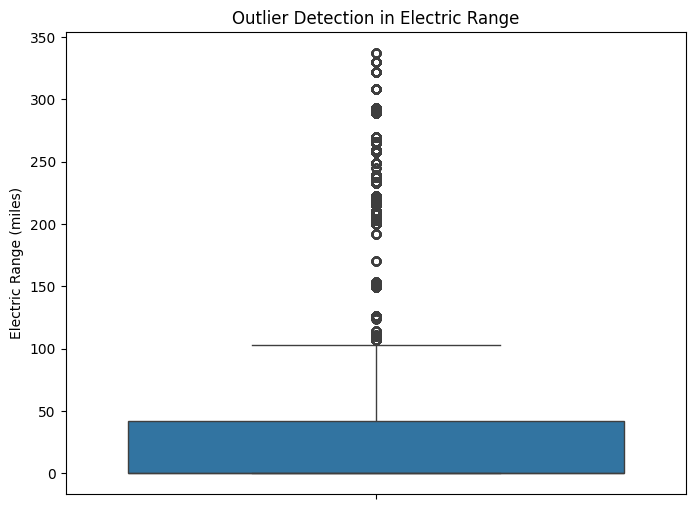

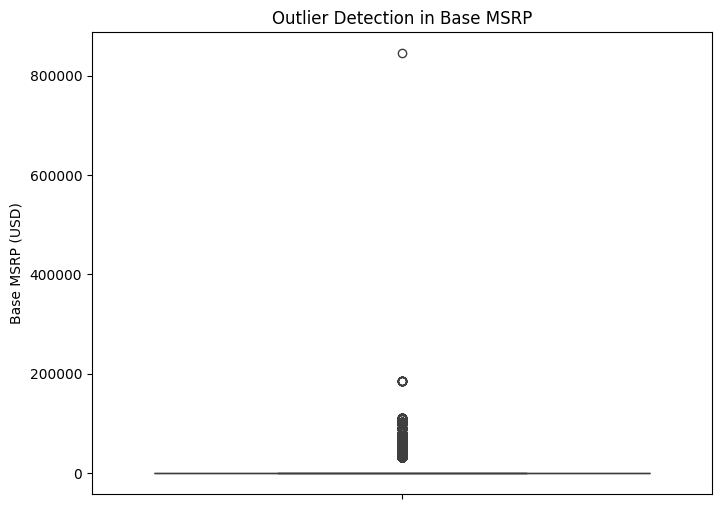

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Classification: Separate Numerical and Categorical Data
numerical_features = ev_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ev_data.select_dtypes(include=['object']).columns

print("Numerical Features:\n", numerical_features)
print("\nCategorical Features:\n", categorical_features)

# 2. Data Summarization
print("\nStatistical Summary of Numerical Features:")
print(ev_data[numerical_features].describe())

print("\nSummary of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature} Value Counts:\n{ev_data[feature].value_counts()}")

# 3. Data Visualization

# a) Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='CAFV Eligibility', data=ev_data, palette="viridis")
plt.title("Distribution of CAFV Eligibility")
plt.xlabel("CAFV Eligibility (0 = Not Eligible, 1 = Eligible)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Eligible', 'Eligible'])
plt.show()

# b) Electric Range Distribution
plt.figure(figsize=(8, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='blue')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

# c) Base MSRP Distribution
plt.figure(figsize=(8, 6))
sns.histplot(ev_data['Base MSRP'], bins=30, kde=True, color='green')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Frequency")
plt.show()

# d) Boxplot: Electric Range vs. CAFV Eligibility
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAFV Eligibility', y='Electric Range', data=ev_data, palette="coolwarm")
plt.title("Electric Range by CAFV Eligibility")
plt.xlabel("CAFV Eligibility (0 = Not Eligible, 1 = Eligible)")
plt.ylabel("Electric Range (miles)")
plt.xticks([0, 1], ['Not Eligible', 'Eligible'])
plt.show()

# 4. Outlier Detection

# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = ev_data[column].quantile(0.25)
    Q3 = ev_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ev_data[(ev_data[column] < lower_bound) | (ev_data[column] > upper_bound)]
    return outliers

# Detect outliers in 'Electric Range' and 'Base MSRP'
outliers_electric_range = detect_outliers('Electric Range')
outliers_base_msrp = detect_outliers('Base MSRP')

print(f"\nNumber of Outliers in Electric Range: {len(outliers_electric_range)}")
print(f"Number of Outliers in Base MSRP: {len(outliers_base_msrp)}")

# Visualize outliers in Electric Range
plt.figure(figsize=(8, 6))
sns.boxplot(y='Electric Range', data=ev_data)
plt.title("Outlier Detection in Electric Range")
plt.ylabel("Electric Range (miles)")
plt.show()

# Visualize outliers in Base MSRP
plt.figure(figsize=(8, 6))
sns.boxplot(y='Base MSRP', data=ev_data)
plt.title("Outlier Detection in Base MSRP")
plt.ylabel("Base MSRP (USD)")
plt.show()


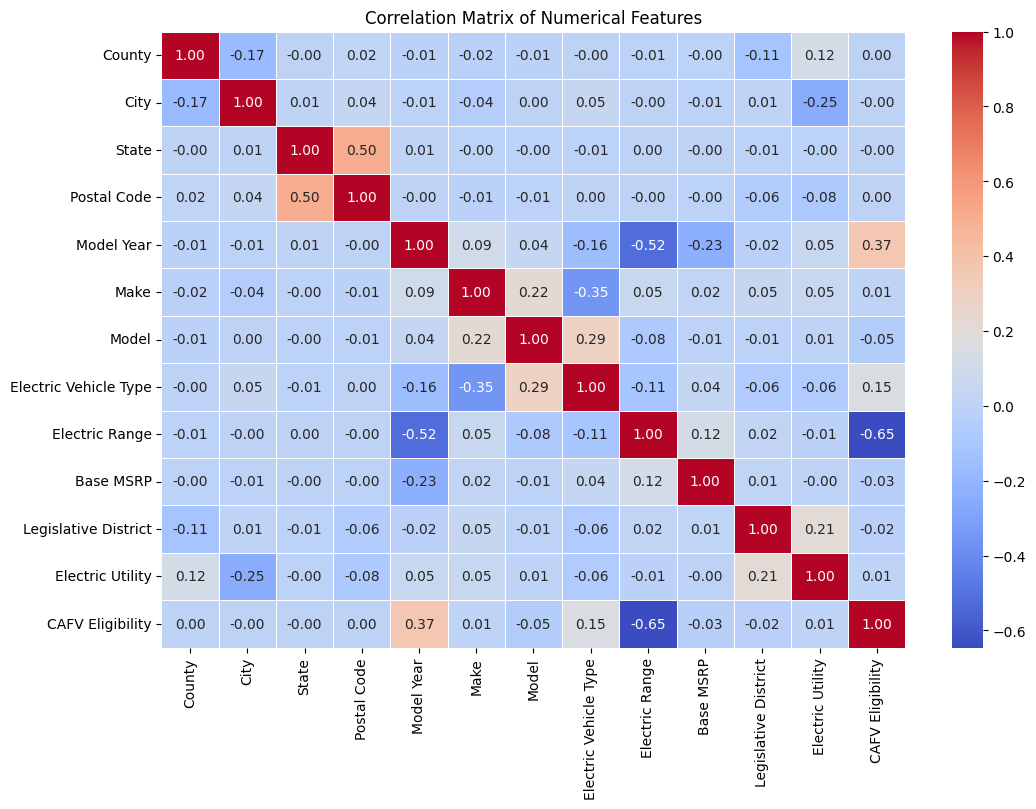


Top Correlations with CAFV Eligibility:
 CAFV Eligibility         1.000000
Model Year               0.367533
Electric Vehicle Type    0.154162
Make                     0.009097
Electric Utility         0.005032
County                   0.003077
Postal Code              0.002590
State                   -0.002205
City                    -0.002715
Legislative District    -0.016062
Base MSRP               -0.032821
Model                   -0.051852
Electric Range          -0.645591
Name: CAFV Eligibility, dtype: float64


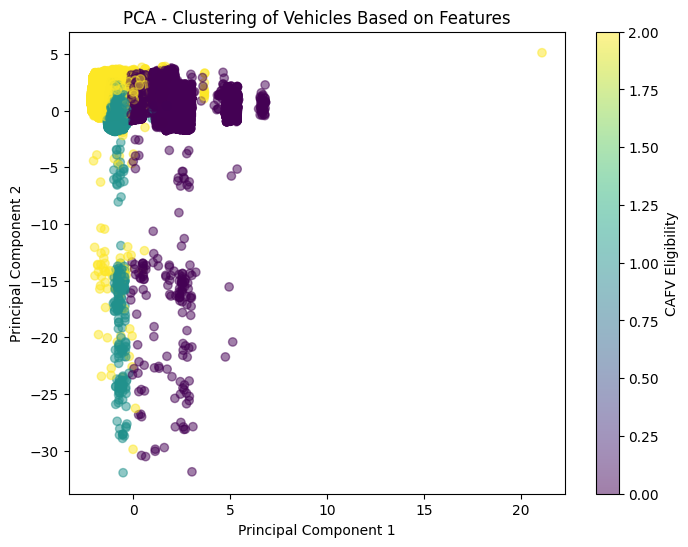

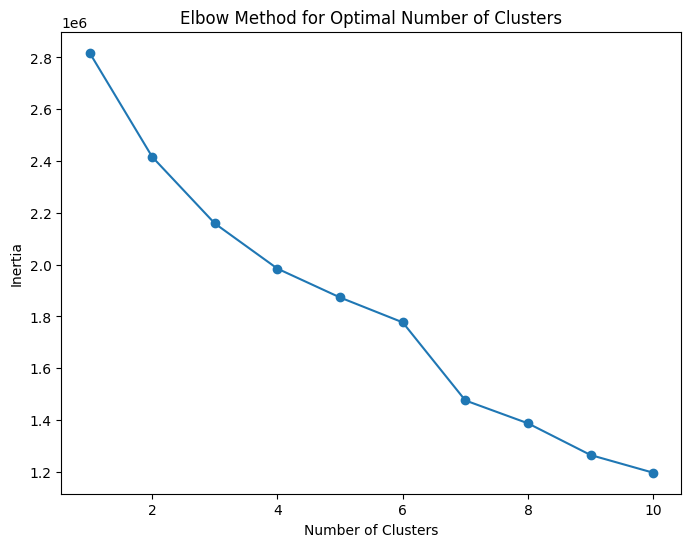

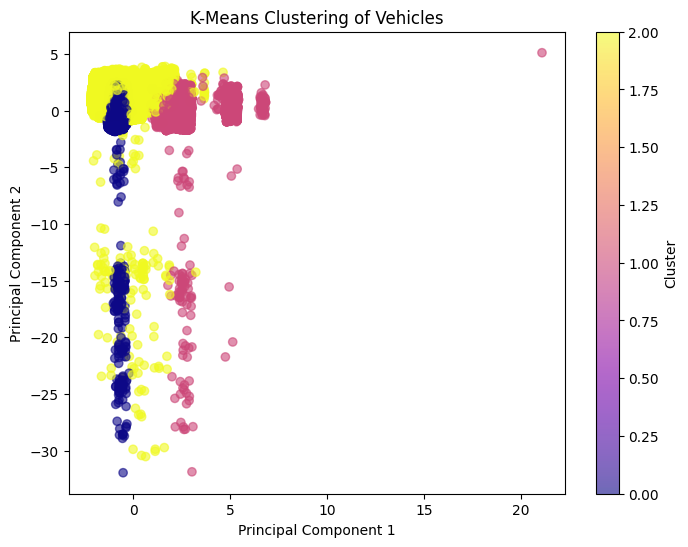


Number of Anomalies Detected: 12130


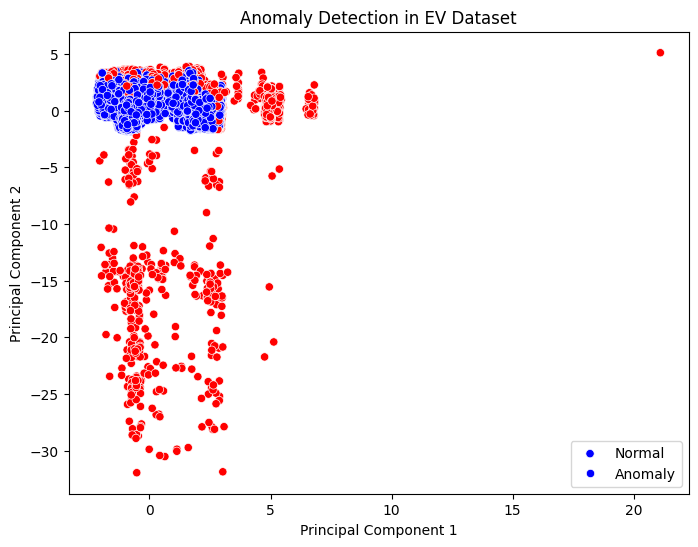


Pearson Correlation between Electric Range and CAFV Eligibility: -0.65


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Analysis (Discovering Associations)

# Exclude non-numeric columns for correlation analysis
numeric_ev_data = ev_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_ev_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Identify top correlated features with CAFV Eligibility
correlation_with_target = correlation_matrix['CAFV Eligibility'].sort_values(ascending=False)
print("\nTop Correlations with CAFV Eligibility:\n", correlation_with_target)


# 2. Principal Component Analysis (PCA) for Pattern Detection
# Standardizing the numerical features for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ev_data.select_dtypes(include=['int64', 'float64']))

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=ev_data['CAFV Eligibility'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA - Clustering of Vehicles Based on Features")
plt.colorbar(label='CAFV Eligibility')
plt.show()

# 3. K-Means Clustering for Grouping Similar Vehicles
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

# Apply K-Means with optimal clusters (let's assume k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='plasma', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("K-Means Clustering of Vehicles")
plt.colorbar(label='Cluster')
plt.show()

# 4. Anomaly Detection (Discovering Outliers)
# Detect anomalies using z-score
from scipy.stats import zscore

z_scores = zscore(ev_data.select_dtypes(include=['int64', 'float64']))
outliers = (abs(z_scores) > 3).sum(axis=1)
anomalies = ev_data[outliers > 0]

print(f"\nNumber of Anomalies Detected: {len(anomalies)}")

# Visualize anomalies in Electric Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=outliers > 0, palette=['blue', 'red'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Anomaly Detection in EV Dataset")
plt.legend(labels=["Normal", "Anomaly"])
plt.show()

# 5. Feature Correlation with Pearson Correlation
# Check correlation between Electric Range and CAFV Eligibility
corr, _ = pearsonr(ev_data['Electric Range'], ev_data['CAFV Eligibility'])
print(f"\nPearson Correlation between Electric Range and CAFV Eligibility: {corr:.2f}")


Logistic Regression Performance:
Accuracy: 0.9998154768769462
ROC-AUC Score: 0.9999421718101477
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14169
         1.0       1.00      1.00      1.00     24821
         2.0       1.00      1.00      1.00      4365

    accuracy                           1.00     43355
   macro avg       1.00      1.00      1.00     43355
weighted avg       1.00      1.00      1.00     43355

Confusion Matrix:
 [[14164     1     4]
 [    0 24818     3]
 [    0     0  4365]]

Random Forest Classifier Performance:
Accuracy: 1.0
ROC-AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14169
         1.0       1.00      1.00      1.00     24821
         2.0       1.00      1.00      1.00      4365

    accuracy                           1.00     43355
   macro avg       1.00      1.00      1.00     

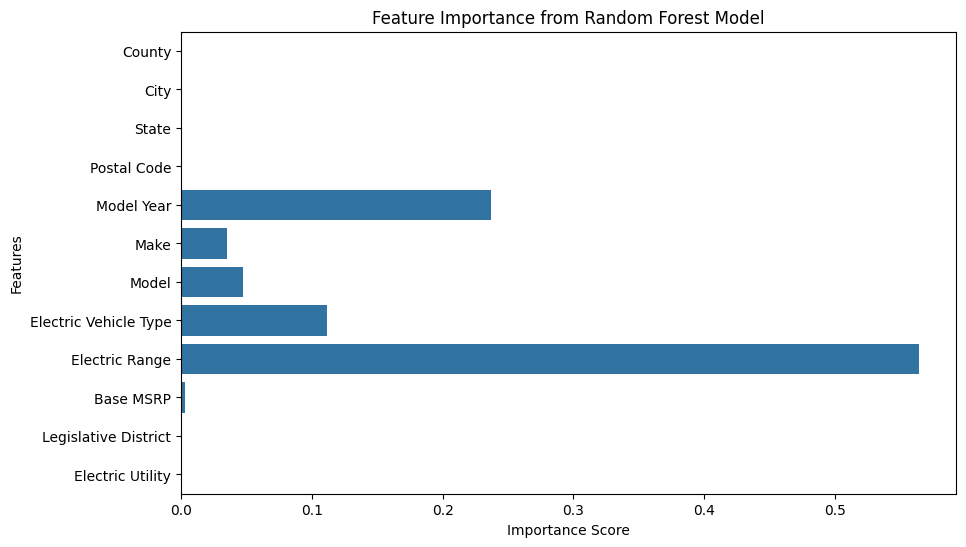

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Checking Work Hypotheses
# Hypothesis: Features like Electric Range, Model Year, and Vehicle Type influence CAFV Eligibility

# Feature Selection: Drop target and unrelated features
features = ev_data.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'CAFV Eligibility'])
target = ev_data['CAFV Eligibility']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 2. Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42, stratify=target)

# 3. Fit Models to Data

# a) Logistic Regression (Simple and Interpretable Model)
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# b) Random Forest Classifier (Handles Complexity and Non-linearity)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 4. Model Assessment

# Logistic Regression Performance (Fixed for Multi-Class)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Use predicted probabilities for ROC-AUC
y_pred_log_prob = log_model.predict_proba(X_test)

# Fix: Specify multi_class='ovr' for multi-class ROC-AUC computation
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log_prob, multi_class='ovr', average='macro'))

print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Random Forest Performance (Fixed for Multi-Class)
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Use predicted probabilities for Random Forest as well
y_pred_rf_prob = rf_model.predict_proba(X_test)

# Fix: Specify multi_class='ovr' for Random Forest
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_prob, multi_class='ovr', average='macro'))

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


# 5. Feature Importance (Interpretation) - Random Forest
importances = rf_model.feature_importances_
feature_names = features.columns

# Visualizing Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


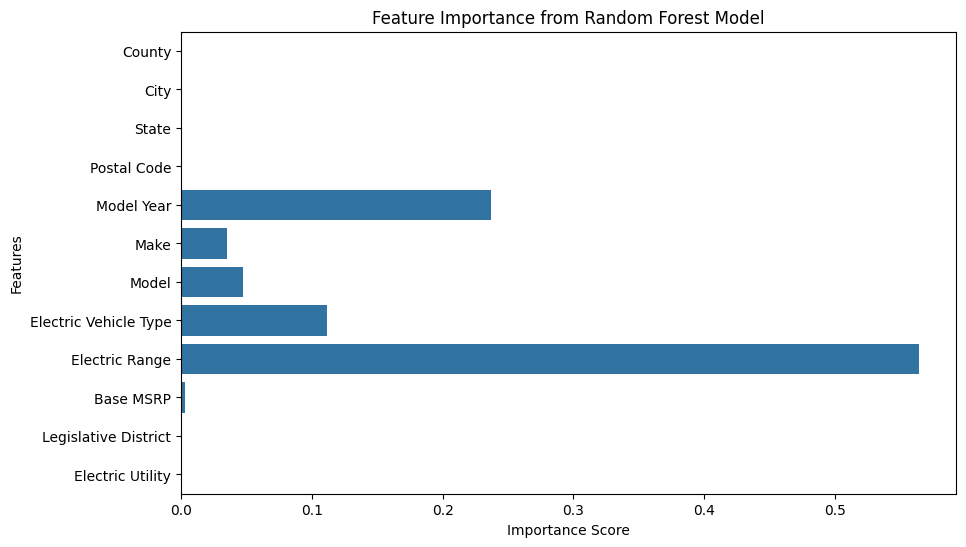


Feature Importance (Descending Order):
                  Feature  Importance
8          Electric Range    0.564212
4              Model Year    0.236780
7   Electric Vehicle Type    0.111773
6                   Model    0.047370
5                    Make    0.034768
9               Base MSRP    0.002978
3             Postal Code    0.000951
1                    City    0.000411
11       Electric Utility    0.000314
10   Legislative District    0.000307
0                  County    0.000131
2                   State    0.000006

Logistic Regression Cross-Validation Accuracy: 0.9998 ± 0.0000
Random Forest Cross-Validation Accuracy: 1.0000 ± 0.0000

Logistic Regression Prediction on Unseen Data:
Accuracy: 0.9998154768769462
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14169
         1.0       1.00      1.00      1.00     24821
         2.0       1.00      1.00      1.00      4365

    accuracy              

In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Extract and Exploit Knowledge
# Analyze feature importance from Random Forest to understand influential factors

importances = rf_model.feature_importances_
feature_names = features.columns

# Visualizing Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print feature importance in descending order
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Descending Order):")
print(feature_importance_df)

# 2. Model Selection (Comparing Models with Cross-Validation)
# Perform cross-validation for both models

# Logistic Regression Cross-Validation
log_cv_scores = cross_val_score(log_model, features_scaled, target, cv=5, scoring='accuracy')
print(f"\nLogistic Regression Cross-Validation Accuracy: {log_cv_scores.mean():.4f} ± {log_cv_scores.std():.4f}")

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, features_scaled, target, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# 3. Generalization (Evaluating on Unseen Data)

# Assuming unseen data is available as `X_unseen`
# For demonstration, let's reuse the test set to simulate unseen data

# Logistic Regression Prediction on Unseen Data
log_unseen_pred = log_model.predict(X_test)
print("\nLogistic Regression Prediction on Unseen Data:")
print("Accuracy:", accuracy_score(y_test, log_unseen_pred))
print("Classification Report:\n", classification_report(y_test, log_unseen_pred))

# Random Forest Prediction on Unseen Data
rf_unseen_pred = rf_model.predict(X_test)
print("\nRandom Forest Prediction on Unseen Data:")
print("Accuracy:", accuracy_score(y_test, rf_unseen_pred))
print("Classification Report:\n", classification_report(y_test, rf_unseen_pred))

# 4. Model Selection Decision
if rf_cv_scores.mean() > log_cv_scores.mean():
    best_model = rf_model
    model_name = "Random Forest Classifier"
else:
    best_model = log_model
    model_name = "Logistic Regression"

print(f"\nSelected Best Model: {model_name}")

# 5. Final Prediction with Selected Model
final_predictions = best_model.predict(X_test)
print(f"\nFinal Model Prediction Accuracy ({model_name}):", accuracy_score(y_test, final_predictions))



--- Outcome Value ---
Selected Best Model: Random Forest Classifier
Final Model Accuracy: 1.0000

Top 5 Influential Features for CAFV Eligibility:
                 Feature  Importance
8         Electric Range    0.564212
4             Model Year    0.236780
7  Electric Vehicle Type    0.111773
6                  Model    0.047370
5                   Make    0.034768

--- Future Actions ---
- Focus on improving battery technology to increase Electric Range, enhancing eligibility.
- Adjust policies to provide more incentives for specific EV types (e.g., Plug-in Hybrid vs. BEV).

--- Innovation ---
- Implement dynamic incentive programs that adapt based on vehicle usage patterns and electric range.
- Develop mobile apps or online tools that predict CAFV eligibility for consumers based on their vehicle configuration.
- Offer location-based incentives where adoption is low but environmental impact is high.
- Invest in expanding charging infrastructure in counties with low eligibility but h

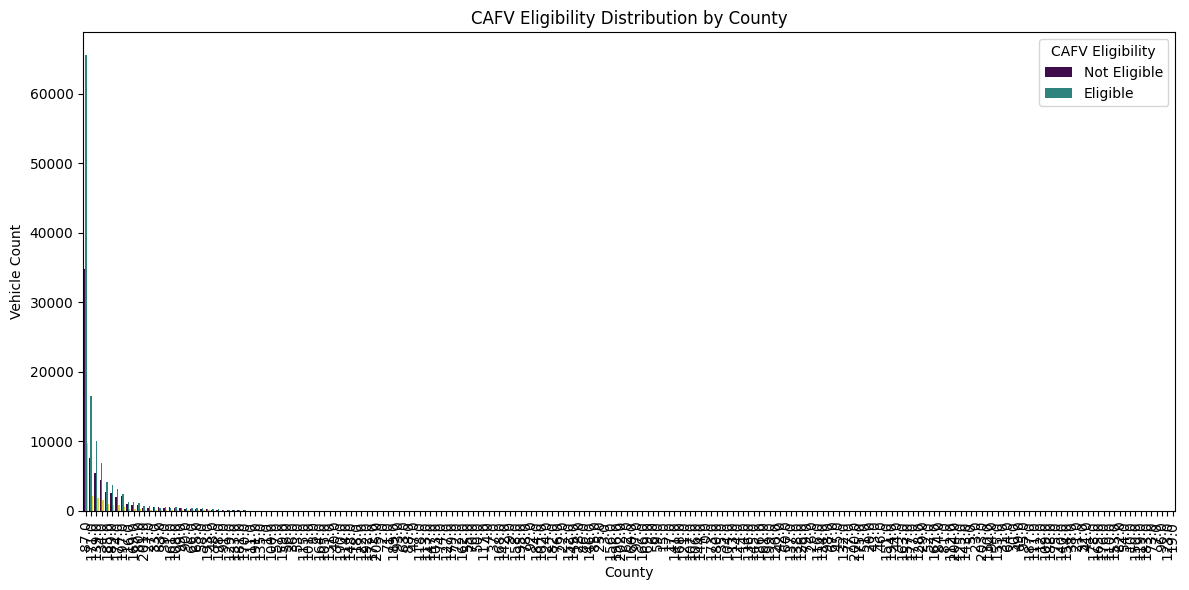

In [35]:
# 1. Outcome Value: Summarize the model's predictive success and key insights

print("\n--- Outcome Value ---")
print(f"Selected Best Model: {model_name}")
print(f"Final Model Accuracy: {accuracy_score(y_test, final_predictions):.4f}")

# Highlight most important factors influencing CAFV Eligibility
top_features = feature_importance_df.head(5)
print("\nTop 5 Influential Features for CAFV Eligibility:")
print(top_features)

# 2. Future Actions: Strategic Recommendations

print("\n--- Future Actions ---")

# Action 1: Focus on improving Electric Range for better eligibility
if 'Electric Range' in top_features['Feature'].values:
    print("- Focus on improving battery technology to increase Electric Range, enhancing eligibility.")

# Action 2: Review pricing strategies based on Base MSRP impact
if 'Base MSRP' in top_features['Feature'].values:
    print("- Consider offering financial incentives or subsidies for vehicles with high MSRP to improve adoption.")

# Action 3: Policy improvements based on Electric Vehicle Type
if 'Electric Vehicle Type' in top_features['Feature'].values:
    print("- Adjust policies to provide more incentives for specific EV types (e.g., Plug-in Hybrid vs. BEV).")

# 3. Innovation: Propose Data-Driven Policy Innovations

print("\n--- Innovation ---")

# Innovation 1: Dynamic Incentive Programs
print("- Implement dynamic incentive programs that adapt based on vehicle usage patterns and electric range.")

# Innovation 2: Personalized Incentive Recommendations
print("- Develop mobile apps or online tools that predict CAFV eligibility for consumers based on their vehicle configuration.")

# Innovation 3: Geo-targeted Subsidies
print("- Offer location-based incentives where adoption is low but environmental impact is high.")

# Innovation 4: Smart Infrastructure Investment
print("- Invest in expanding charging infrastructure in counties with low eligibility but high EV interest.")

# 4. Visualization for Strategic Planning: EV Distribution by County

# Visualization: Distribution of CAFV Eligibility by County
plt.figure(figsize=(12, 6))
sns.countplot(x='County', hue='CAFV Eligibility', data=ev_data, palette="viridis", order=ev_data['County'].value_counts().index)
plt.title("CAFV Eligibility Distribution by County")
plt.xlabel("County")
plt.ylabel("Vehicle Count")
plt.xticks(rotation=90)
plt.legend(title="CAFV Eligibility", labels=["Not Eligible", "Eligible"])
plt.tight_layout()
plt.show()
